# Metody statystyczne zestaw 2
## Autor Paweł Jelonek

### Symulacja procesu Markova
 - $2$ użytkowników
 - $1$ komputer

#### Do komputera zalogowanych może być:
 - $x = 0$(użytkowników)
 - $x = 1$(użytkowników)
 - $x = 2$(użytkowników)

Prawdopodonbieństwo logowania $P_{logowania} = 0.2$<br>
Prawdopodonbieństwo pozostania niezalogowanym $1 - P_{logowania} = 0.8$<br>
Prawdopodonbieństwo wylogowania $P_{wylogowania} = 0.5$<br>
Prawdopodonbieństwo pozostania zalogowanym $1-P_{wylogowania} = 0.5$<br>



Macierz Przejść $= \left[\begin{array}{ccc}
0.64 & 0.32 & 0.04\\
0.4 & 0.5 & 0.1\\
0.25 & 0.5 & 0.25\\
\end{array}\right]$

In [1]:
from numpy import subtract, random, arange, matrix, subtract, abs, ndenumerate 
from numpy.linalg import matrix_power, det, solve
from matplotlib import pyplot as plt

### Problem A
### Policzyć $[P]^N$ dla dużych $N$

In [2]:
P = [[0.64, 0.32, 0.04],
    [0.40, 0.50, 0.10],
    [0.25, 0.50, 0.25]]

In [3]:
power = 100
print(matrix_power(P, power))

[[0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]
 [0.51020408 0.40816327 0.08163265]]


### Kryterium zbieżności $|P^N - P^{N-1}| < 10^{-5}$

In [4]:
def convergence_of_P(N, P):
    y= []
    for n in range(2, N):
        prev_P = matrix_power(P, n-1)
        current_p = matrix_power(P, n)
        y.append(abs(subtract(current_p, prev_P)[1,1]) - 0.00001)
    return y

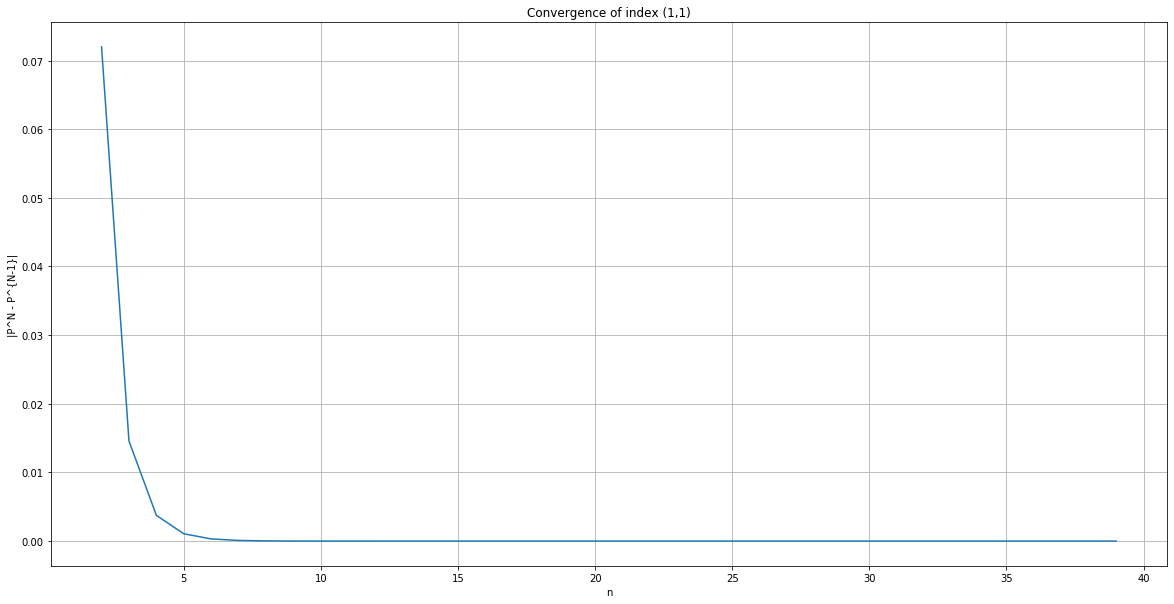

In [22]:
N = 40
y = convergence_of_P(N, P)
plt.grid()
plt.title("Convergence of index (1,1)")
plt.xlabel('n')
plt.ylabel('|P^N - P^{N-1}|')
plt.rcParams["figure.figsize"]=(20, 10)
plt.plot(range(2, N), y)
plt.show()

### Można narysować wykres gdzie:
### $y = [P^n]ij$
### $x = n$

In [6]:
def markov_chain(N, P, tuple):
    y = []
    for n in range(1, N):
        tn = matrix_power(P, n)
        y.append(tn[tuple[0], tuple[1]])
    return y

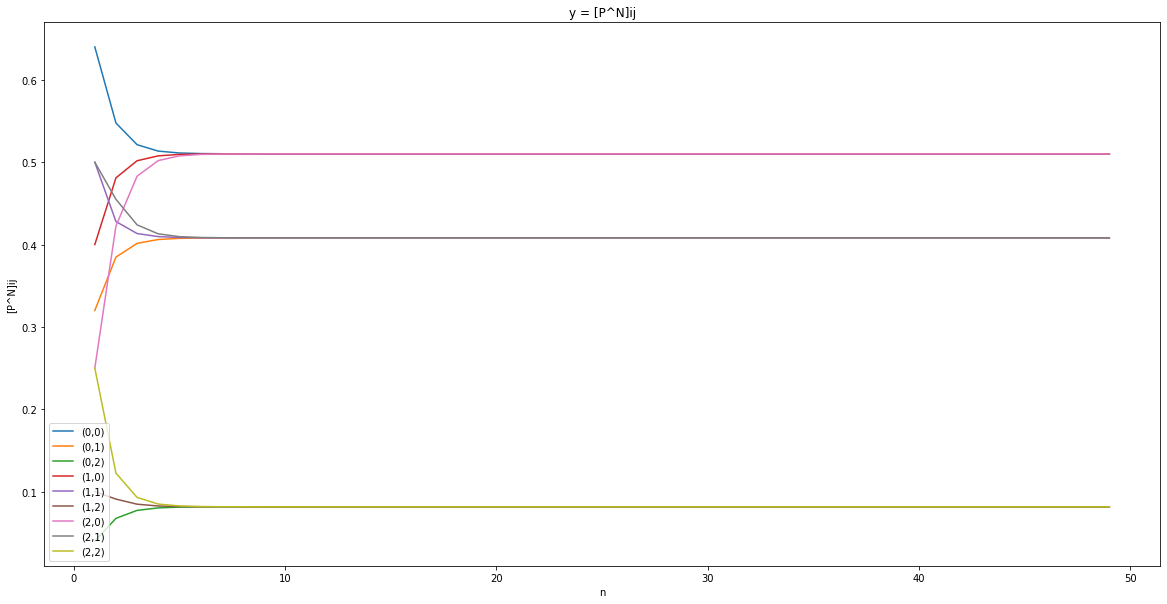

In [7]:
N = 50
for (index_tuple, value) in ndenumerate(P):
        y = markov_chain(N, P, index_tuple)
        plt.plot(range(1, N), y, label="(" + str(index_tuple[0]) + "," + str(index_tuple[1]) + ")")
        
plt.title("y = [P^N]ij")
plt.xlabel('n')
plt.ylabel('[P^N]ij')
plt.legend(loc='best')
plt.rcParams["figure.figsize"]=(20, 10)
plt.show()

### Problem B
### Start z wybranego węzła $x=0,1,2$ <br> Losowanie kolejnego węzła zgodnie z $P$<br>Przejście do nowego węzła

In [8]:
def find_new_node(random_number, current_index, P):
    prob_total = 0.0
    index = 0
    for prob in P[current_index]:
        prob_total += prob
        if random_number <= prob_total:
            return index
        index += 1

In [9]:
def simulate_markov_frequency(N, index, P):
    y1 = N * [0]
    y2 = N * [0]
    y3 = N * [0]
    current_index = index
    for n in range(N):
        new_index = find_new_node(random.uniform(0, 1), current_index, P)
        if new_index == 0:
            y1[n] += y1[n-1] + 1
            y2[n] += y2[n-1]
            y3[n] += y3[n-1]
        if new_index == 1:
            y2[n] += y2[n-1] + 1
            y1[n] += y1[n-1]
            y3[n] += y3[n-1]
        if new_index == 2:
            y3[n] += y3[n-1] + 1
            y1[n] += y1[n-1]
            y2[n] += y2[n-1]
        current_index = new_index
    return y1, y2, y3

### Losowanie dla $~N=10^4$
### Policzenie $\pi^{exp}_{i} = N^{i}/N, N^{i}$ - ile razy odwiedzone $x = (0,1,2)$

Starting node:  0
Percentage of visiting node 0 equals 0.5037
Percentage of visiting node 1 equals 0.4116
Percentage of visiting node 2 equals 0.0847
Node 0 to theory: 0.00650408163265459
Node 1 to theory: 0.003436734693876231
Node 2 to theory: 0.0030673469387752644


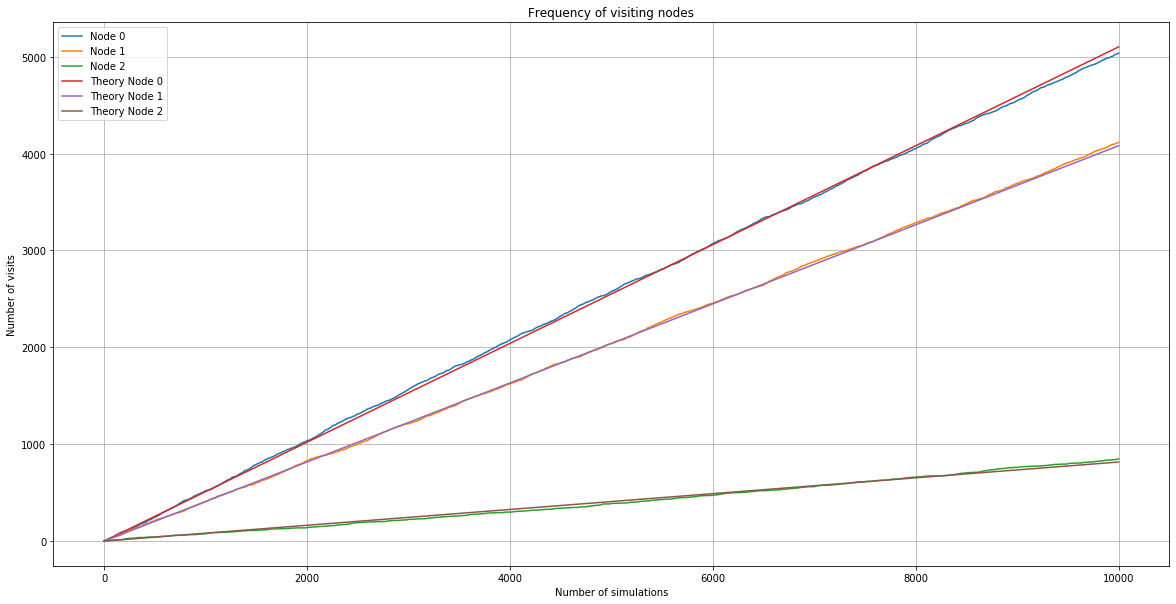

In [10]:
N = 10000
x = 0
power = 100
theory_matrix = matrix_power(P, power)
y1, y2, y3 = simulate_markov_frequency(N, x, P)
print('Starting node: ', x)
plt.grid()
plt.title('Frequency of visiting nodes')
plt.xlabel('Number of simulations')
plt.ylabel('Number of visits')
plt.rcParams["figure.figsize"]=(20, 10)
plt.plot(range(N), y1, label='Node 0')
plt.plot(range(N), y2, label='Node 1')
plt.plot(range(N), y3, label='Node 2')


print('Percentage of visiting node 0 equals', y1[len(y1)-1]/N)
print('Percentage of visiting node 1 equals', y2[len(y2)-1]/N)
print('Percentage of visiting node 2 equals', y3[len(y3)-1]/N)

comp_to_theory_A = abs(theory_matrix[0][0] - (y1[len(y1)-1]/N))
comp_to_theory_B = abs(theory_matrix[0][1] - (y2[len(y2)-1]/N))
comp_to_theory_C = abs(theory_matrix[0][2] - (y3[len(y3)-1]/N))

print('Node 0 to theory:', comp_to_theory_A)
print('Node 1 to theory:', comp_to_theory_B)
print('Node 2 to theory:', comp_to_theory_C)

y1_theory = []
y2_theory = []
y3_theory = []
for n in range(N):
    y1_theory.append(theory_matrix[0][0] * n)
    y2_theory.append(theory_matrix[0][1] * n)
    y3_theory.append(theory_matrix[0][2] * n)
plt.plot(range(N), y1_theory, label='Theory Node 0')
plt.plot(range(N), y2_theory, label='Theory Node 1')
plt.plot(range(N), y3_theory, label='Theory Node 2')   
plt.legend(loc='best')
plt.show()

### Porównanie z $[P]^{N}$, start z $x=(0,1,2)$, zbieżność

### Problem C
- $100$ użytkowników
- $x = 0,1,2,...,100$ 
- $P_{logowania} = 0.2$, $P_{wylogowania}=0.5$
- Trudno jest skonstruować macierz prawdopodobieństwo
- Wykonujemy symulację trajektorii
- Ile wynosi $\Pi^{exp}_{i}$ dla $i=0,1,...100$?
- Wykresy zbieżności $\Pi^{exp}_{i}=N^{i}/N$

In [11]:
def calculate_new_state(user_state, prob_login, prob_logout, random):
    if not user_state:
        return random < prob_login
    else:
        return random < prob_logout

In [12]:
def simulate_markov_frequency2(users, prob_login, prob_logout, n_users):
    for user_state in range(0, n_users):
        new_state = calculate_new_state(user_state, prob_login, prob_logout, random.uniform(0, 1))
        users[user_state] = new_state
    state_node = 0
    for user_state in users:
        if user_state is True:
            state_node += 1
    return state_node

In [13]:
def create_frequency(results, state, N):
    state_frequency = []
    frequency = 0
    for n in range(len(results)):
        if results[n] == state:
            frequency += 1
        state_frequency.append(frequency/N)
    return state_frequency

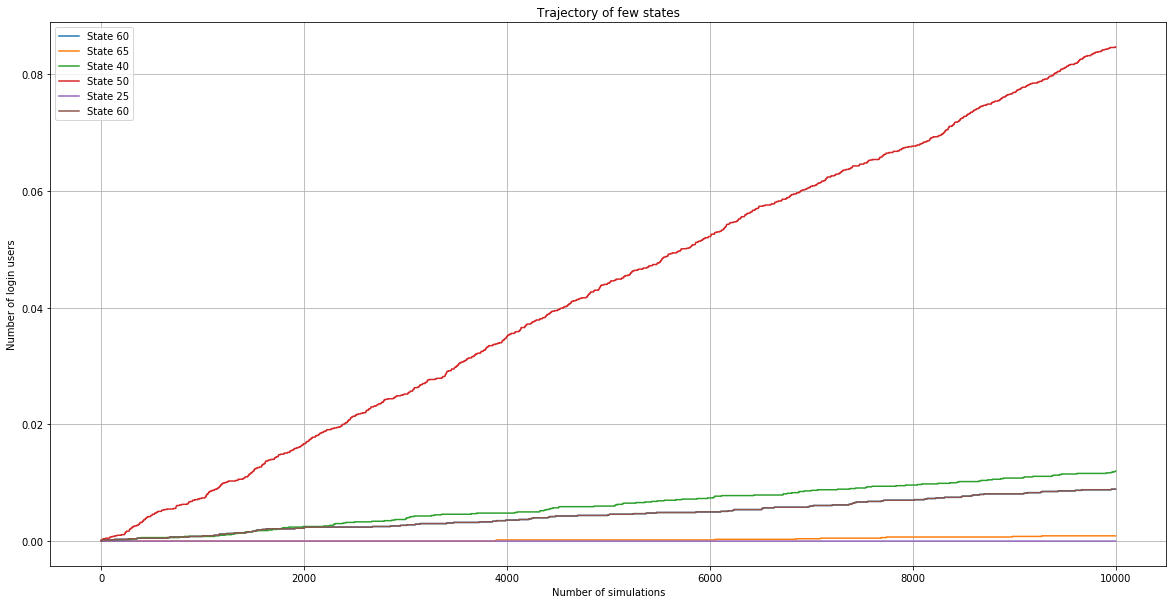

In [14]:
n_users = 100
users = [False] * n_users
prob_login = 0.2
prob_logout = 0.5
N = 10000
results = []
for n in range(1, N):
    results.append(simulate_markov_frequency2(users, prob_login, prob_logout, n_users))

y1 = create_frequency(results, 60, N)
y2 = create_frequency(results, 65, N)
y3 = create_frequency(results, 40, N)
y4 = create_frequency(results, 50, N)
y5 = create_frequency(results, 25, N)
y6 = create_frequency(results, 60, N)
plt.plot(y1, label='State 60')
plt.plot(y2, label='State 65')
plt.plot(y3, label='State 40')
plt.plot(y4, label='State 50')
plt.plot(y5, label='State 25')
plt.plot(y6, label='State 60')
plt.grid()
plt.title('Trajectory of few states')
plt.xlabel('Number of simulations')
plt.ylabel('Number of login users')
plt.rcParams["figure.figsize"]=(20, 10)
plt.legend(loc='best')

plt.show()

### Problem D
#### Podobna symulacja jak w punkcie C, inne <br> prawdopodobieństwa dla wylogowanych
$P_{logowania} = 0.2$<br>
$P_{niezalogowania} = 0.8$<br>
$P_{wylogowania} = 1-(0.008x+0.1)$<br>
$P_{pozostaniazalogowanym} = 0.008x+0.1$<br>

In [15]:
def calculate_new_state(user_state, prob_login, prob_logout, random):
    if not user_state:
        if random < prob_login:
            return True
        else: 
            return False
    else:
        if random < prob_logout:
            return False
        else:
            return True

In [16]:
def prob_logout(x):
    return 1 - (0.008*x + 0.1)

In [17]:
def simulate_markov_frequency3(users, prob_login, n_users, active_users):
    new_active_users = active_users
    for user_state in range(0, n_users):
        old_state = user_state
        new_state = calculate_new_state(user_state, prob_login, prob_logout(active_users), random.uniform(0, 1))
        if old_state is True and new_state is False:
            new_active_users -= 1
        if old_state is False and new_state is True:
            new_active_users += 1
        users[user_state] = new_state
    state_node = 0
    for user_state in users:
        if user_state is True:
            state_node += 1
    return state_node, new_active_users

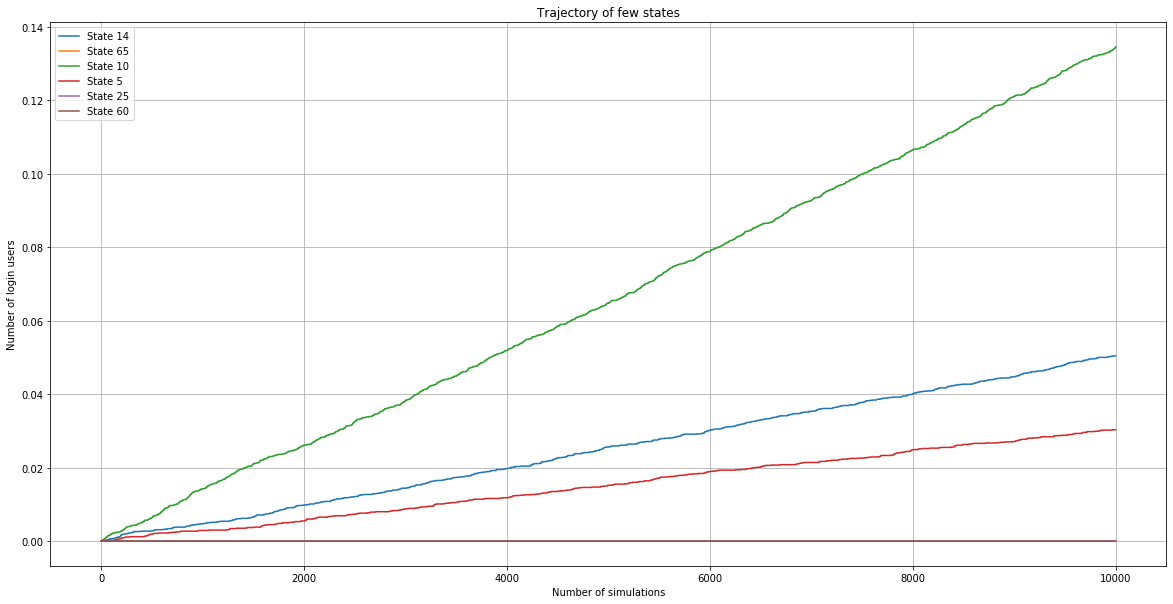

In [20]:
n_users = 100
users = [False] * n_users
prob_login = 0.2
N = 10000
results = []
active_users = 0
for n in range(N):
    y1, new_active_users = simulate_markov_frequency3(users, prob_login, n_users, active_users) 
    active_users = new_active_users
    results.append(y1)
y1 = create_frequency(results, 14, N)
y2 = create_frequency(results, 65, N)
y3 = create_frequency(results, 10, N)
y4 = create_frequency(results, 5, N)
y5 = create_frequency(results, 25, N)
y6 = create_frequency(results, 60, N)
plt.plot(y1, label='State 14')
plt.plot(y2, label='State 65')
plt.plot(y3, label='State 10')
plt.plot(y4, label='State 5')
plt.plot(y5, label='State 25')
plt.plot(y6, label='State 60')
plt.grid()
plt.title('Trajectory of few states')
plt.xlabel('Number of simulations')
plt.ylabel('Number of login users')
plt.rcParams["figure.figsize"]=(20, 10)
plt.legend(loc='best')

plt.show()